In [1]:
# Original code written for diabetes analysis by: 
# Ameen Abdel Hai 
# Marija Stanojevic 
# Branimir Ljubic

In [2]:
import csv
import pandas as pd
import sys

**Negative and Positive Cohort**

Psotive and Negative cohort. 1 to 1 ratio (50% positive and 50% negative)

Basically, create a new file that contains patients who were diagnosed with diabetes and other specific 
diseases listed in diseases list.

@Input file: indexed data excludes procedures. All patients in this file are diabetics <br/>
@Output file:  a new file that contains patients who developed certain disease after 4 visits

In addition, this file also keeps track of patients IDS who are positive, such that we can take
negative patients by making sure the ID is not in the list of patients who tested positive
<hr/>
First, create two seperate files for positive and negative, then, take all positive patients and the same number from the negative patients

In [3]:
# D_427 -> 30 AFib
# D_434 -> 158 Stroke
# D_428 -> 5 heart failure
# D_425 -> 78 cardiomyopathy

diseases = ["78"]
diseases_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
patient_ids_with_positive_cohort = []
output_file = 'HCUP_indexed_positive.csv'

csv_positive_cohort = open(output_file, mode='w')

file = 'HCUP_indexed_ex_procedures.csv'
with open(file) as csv_file:
    for line in csv_file:    
        row = line.split(',')

        for x in range(0, len(row)):
            
            # primary diagnosis
            if row[x] == '30': # 3 -> diabetes/D_250
                i = x
                data = row[i:] 
                # print(data)
                c = 0
                for i in range(0, len(data)):
                    if '#' in data[i]:
                        c+=1
                    if c == 4: # number of visits between
                        data_2 = data[:i]
                        data_3 = data[i:]
                        for j in range(len(diseases)):
                            for x in data_3:
                                
                                if '#' in x: x = x.split('#')[0]
                                
                                if diseases[j] == x:
                                    
                                    flag = False
                                    for y in data_2:
                                        if diseases[j] == y:
                                            flag = True
                                            break
                                    if not flag:
                                        diseases_count[j] += 1
                                        csv_positive_cohort.write(line) 
                                        patient_id = line.split('|')[0]
                                        patient_ids_with_positive_cohort.append(patient_id) # to keep track
                                        break        
                                    
                        break
                break

        
csv_positive_cohort.close()
print(diseases_count)

[92256, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Now, we have a dataset that contains all positive patients. 
Lets create a file with patients/diabetics who do not have specific disease (negative/0)

In [4]:
# Get negative cohort for med_code: D_413/index: 107
out_file = 'HCUP_indexed_negative.csv'
negative_cohort_file = open(out_file, mode='w')


with open(file, mode='r') as input_file:
    for row in input_file:
        patient_id = row.split('|')[0]
        # if patient id is not in the list of positive, then negative
        if patient_id not in patient_ids_with_positive_cohort: 
            negative_cohort_file.write(row)

negative_cohort_file.close()
print("done")

done


Test and count how many negative and positive patients there are 
take all positive patients and same number of patients from negative

In [5]:
# Test data-set
file = 'HCUP_indexed_positive.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        counter+=1
print(counter)

# Test data-set
file = 'HCUP_indexed_negative.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        #print(row)
        counter+=1
print(counter)

92256
3634092


Now, we have two different datasets. Positive and negative patients

Create a new file that contains 1 to 1 ratio - 50/50 balanced data

In [6]:
# 1 to 1 ratio - 50/50 - balanced data
file = 'HCUP_1_to_1.csv'
new_csv = open(file, mode='w')
input_file = 'HCUP_indexed_positive.csv'

counter = 0
with open(input_file, mode='r') as data:
    for row in data:
        counter += 1
        new_csv.write(row)
new_csv.close()
print('rows written', counter)
NUMPOS = counter
# first 21631 are positive

rows written 92256


In [7]:
# 1 to 1 ratio - 50/50 - balanced data
file = 'HCUP_1_to_1.csv'
new_csv = open(file, mode='a')
input_file = 'HCUP_indexed_negative.csv'

counter = 0
with open(input_file, mode='r') as data:
    for row in data:
        if counter == NUMPOS: break
        counter += 1
        new_csv.write(row)
new_csv.close()
# second 21631 are negative
print('rows written', counter)

rows written 92256


Test and count total number - should be 21631*2 = 43262

In [8]:
# Test data-set
file = 'HCUP_1_to_1.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        # print(row)
        counter+=1
print(counter)
NUMTOT = counter

184512


<hr/>
<hr/>
<hr/>
<hr/>
<hr/>

Load med codes

In [9]:
codes_d = {}
file = 'disease_codes.csv'
with open(file) as input_data:
    for code in input_data:
        index = code.split(',')[0][2:-1]
        code = code.split(',')[1][1:-2]
        
        codes_d[code] = index

In [10]:
# lets take a look into the dict
print(len(codes_d))
for k, v in codes_d.items():
    print(k, '-->', v)


2350
1 --> D_402
2 --> D_424
3 --> D_250
4 --> D_416
5 --> D_428
6 --> D_852
7 --> D_276
8 --> D_782
9 --> D_401
10 --> D_780
11 --> D_285
12 --> D_518
13 --> D_507
14 --> D_038
15 --> D_995
16 --> D_907
17 --> D_458
18 --> D_692
19 --> D_263
20 --> D_438
21 --> D_787
22 --> D_482
23 --> D_584
24 --> D_599
25 --> D_008
26 --> D_799
27 --> D_560
28 --> D_486
29 --> D_578
30 --> D_427
31 --> D_553
32 --> D_262
33 --> D_041
34 --> D_997
35 --> D_585
36 --> D_403
37 --> D_536
38 --> D_294
39 --> D_151
40 --> D_491
41 --> D_571
42 --> D_272
43 --> D_456
44 --> D_572
45 --> D_303
46 --> D_453
47 --> D_280
48 --> D_496
49 --> D_300
50 --> D_296
51 --> D_501
52 --> D_185
53 --> D_515
54 --> D_305
55 --> D_789
56 --> D_600
57 --> D_595
58 --> D_530
59 --> D_591
60 --> D_287
61 --> D_441
62 --> D_311
63 --> D_433
64 --> D_356
65 --> D_255
66 --> D_426
67 --> D_786
68 --> D_412
69 --> D_079
70 --> D_790
71 --> D_535
72 --> D_722
73 --> D_847
74 --> D_724
75 --> D_410
76 --> D_784
77 --> D_414
78 

671 --> D_320
672 --> D_903
673 --> D_542
674 --> D_330
675 --> D_158
676 --> D_989
677 --> D_160
678 --> D_835
679 --> D_667
680 --> D_347
681 --> D_878
682 --> D_647
683 --> D_017
684 --> D_449
685 --> D_096
686 --> D_677
687 --> D_048
688 --> D_039
689 --> D_099
690 --> D_052
691 --> D_879
692 --> D_871
693 --> D_650
694 --> D_134
695 --> D_015
696 --> D_221
697 --> D_838
698 --> D_655
699 --> D_232
700 --> D_476
701 --> D_880
702 --> D_299
703 --> D_936
704 --> D_673
705 --> D_866
706 --> D_176
707 --> D_007
708 --> D_770
709 --> D_inc
710 --> D_520
711 --> D_229
712 --> D_058
713 --> D_748
714 --> D_772
715 --> D_941
716 --> D_463
717 --> D_417
718 --> D_776
719 --> D_775
720 --> D_779
721 --> D_777
722 --> D_744
723 --> D_541
724 --> D_749
725 --> D_773
726 --> D_743
727 --> D_760
728 --> D_973
729 --> D_010
730 --> D_771
731 --> D_765
732 --> D_769
733 --> D_768
734 --> D_774
735 --> D_764
736 --> D_033
737 --> D_767
738 --> D_761
739 --> D_385
740 --> D_057
741 --> D_035
742 --

5371 --> D_V830
5372 --> D_V812
5373 --> D_V715
5374 --> D_V480
5375 --> D_V798
5376 --> D_V022
5377 --> D_V491
5378 --> D_V036
5379 --> D_V726
5380 --> D_V492
5381 --> D_V028
5382 --> D_V279
5383 --> D_V033
5384 --> D_V848
5385 --> D_V401
5386 --> D_V651
5387 --> D_V062
5388 --> D_V092
5389 --> D_V769
5390 --> D_V060
5391 --> D_V598
5392 --> D_V019
5393 --> D_V039
5394 --> D_V502
5395 --> D_V068
5396 --> D_V639
5397 --> D_V320
5398 --> D_V040
5399 --> D_V689
5400 --> D_V655
5401 --> D_V659
5402 --> D_V041
5403 --> D_V882
5404 --> D_V788
5405 --> D_V400
5406 --> D_V595
5407 --> D_V592
5408 --> D_V591
5409 --> D_V259
5410 --> D_V059
5411 --> D_V613
5412 --> D_V483
5413 --> D_V771
5414 --> D_V488
5415 --> D_V410
5416 --> D_V508
5417 --> D_V679
5418 --> D_V725
5419 --> D_V284
5420 --> D_V522
5421 --> D_V429
5422 --> D_V289
5423 --> D_V708
5424 --> D_V032
5425 --> D_V722
5426 --> D_V593
5427 --> D_V192
5428 --> D_V479
5429 --> D_V700
5430 --> D_V693
5431 --> D_V671
5432 --> D_V473
5433 -->

10660 --> P_406
10661 --> P_856
10662 --> P_412
10663 --> P_138
10664 --> P_824
10665 --> P_569
10666 --> P_651
10667 --> P_732
10668 --> P_496
10669 --> P_817
10670 --> P_172
10671 --> P_209
10672 --> P_592
10673 --> P_480
10674 --> P_112
10675 --> P_139
10676 --> P_122
10677 --> P_128
10678 --> P_350
10679 --> P_479
10680 --> P_087
10681 --> P_273
10682 --> P_639
10683 --> P_208
10684 --> P_199
10685 --> P_436
10686 --> P_149
10687 --> P_641
10688 --> P_145
10689 --> P_657
10690 --> P_607
10691 --> P_187
10692 --> P_821
10693 --> P_761
10694 --> P_614
10695 --> P_229
10696 --> P_632
10697 --> P_621
10698 --> P_701
10699 --> P_668
10700 --> P_164
10701 --> P_247
10702 --> P_596
10703 --> P_249
10704 --> P_398
10705 --> P_842
10706 --> P_433
10707 --> P_691
10708 --> P_176
10709 --> P_762
10710 --> P_414
10711 --> P_313
10712 --> P_637
10713 --> P_782
10714 --> P_326
10715 --> P_750
10716 --> P_253
10717 --> P_581
10718 --> P_000
10719 --> P_067
10720 --> P_770
10721 --> P_195
10722 --

In [11]:
# count how many times a code occur per patient
file = 'HCUP_1_to_1.csv'
counter = 0

code_count = {}

patient_index = 1
with open(file) as test_data:
    for row in test_data:
        visits = row.replace('\n','').split('|')[2].split('#')
        for k in range(0,len(visits)):
            visit_codes = visits[k].split(',')[1:]
            # print(visit_codes)
            for v in visit_codes:
                code_count[v] = code_count.get(v, 0) + 1
   

In [12]:
print('afib:', code_count['30'])
print('comp:', code_count[diseases[0]])

afib: 1001724
comp: 287927


In [13]:
# Delete those medical codes from dataset 
keys_to_delete = []
counter = 0
for k, v in code_count.items():
     if v < 50 or v > 200000:
        counter += 1
        keys_to_delete.append(k)
        
print(counter)
# delete those codes from data-set 

404


In [14]:
# new medical codes is a dict that exludes codes that we wanted to delete
counter = 0
new_med_codes = {}
for k, v in codes_d.items():
    if k in keys_to_delete:
        continue
    new_med_codes[k] = v

In [15]:
# delete procedures from new_med_codes
med_codes_without_procedures = {}
for k, v in new_med_codes.items():
    if v.startswith("P_"):
        continue
    med_codes_without_procedures[k] = v

In [16]:
# Create a new medical codes file - Code and its index
import operator

codes_file = open('disease_codes_v2.csv', 'w')

for k, v in med_codes_without_procedures.items():
    codes_file.write('(\'' + v + '\', ' + k + ")\n")
codes_file.close() 

In [17]:
# create a new file that excludes medical codes to delete
new_file = 'HCUP_1_to_1_v2.csv'

new_csv = open(new_file, mode='w')

file = 'HCUP_1_to_1.csv'

with open(file) as input_file:
    for line in input_file:
        front = line.replace('\n', '').split('|')[:2]
        visits = line.replace('\n','').split('|')[2].split('#')
        new_visits = []
        
        for visit in visits:
            link_and_age = visit.split(',')[:2]
            med_codes = visit.split(',')[2:]
            new_codes = []
            
            for med_code in med_codes:
                # med_code is not '-99' and
                 if med_code in med_codes_without_procedures:
                    new_codes.append(str(med_code))
            new_visits.append(','.join(link_and_age + new_codes))
        new_csv.write('|'.join(front) + '|' + '#'.join(new_visits) + '\n')
new_csv.close()

In [18]:
# Test data-set
file = 'HCUP_1_to_1_v2.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        # print(row)
        counter+=1
print(counter)

184512


<hr/>
<hr/>
<hr/>
<hr/>
<hr/>

**MAKE AMENDMENT**

For those patients who were tested positive, remove visits after that contain the certain complication we are looking for and after
and for those who were tested negative, leave the length as it is

In [19]:
# Cut positive patients such that we only have the row from 0 until we find the medical code of the required complication 

file = 'HCUP_1_to_1_v2.csv'
out_file = 'HCUP_1_to_1_v3.csv'
new_csv = open(out_file, mode = 'w')
counter = 0

with open(file, mode='r') as csv_file:
    for line in csv_file:
        if counter < NUMPOS:
            counter += 1
            front = line.replace('\n', '').split('|')[:2]
            visits = line.replace('\n','').split('|')[2].split('#')

            index = 0
            for v in visits:
                index+=1
                if diseases[0] in v:
                    new_csv.write('|'.join(front) + '|' + '#'.join(visits[0:index-1]) + '\n')
                    break
        else:
            new_csv.write(line) 
new_csv.close()

In [20]:
# Test data-set
file = 'HCUP_1_to_1_v3.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        # print(row)
        counter+=1
print(counter)

138036


In [21]:
# Checks avg number of visits per patients for positive and negative class to make sure we are not biased

file = 'HCUP_1_to_1_v3.csv'

avg_len_pos = 0
avg_len_neg = 0

counter = 0
with open(file, mode='r') as csv_file:
    for line in csv_file:
        if counter < NUMPOS:
            avg_len_pos += line.count("#")
        else:
            avg_len_neg += line.count("#")
        counter += 1
print(avg_len_pos / NUMTOT)
print(avg_len_neg / NUMTOT)
        

2.853337452306625
1.6986049687825182


In [22]:
###### added in ###### Wilson
# this block calculates days between visits

days = []
count = 0
with open('HCUP_1_to_1_v3.csv') as csv_file:
    for line in csv_file:
        visits = line.replace('\n','').split('|')[2].split('#')
        #print(visits)
        if visits[0].split(',')[0] != '':
            initialDate = int(visits[0].split(',')[0])
        else:
            days.append(0)
            continue
        for visit in visits:
            currentDate = int(visit.split(',')[0])
            if currentDate < initialDate:
                days.append(-1)
                continue
            days.append(int(visit.split(',')[0]) - initialDate)

In [23]:
# creates matrix where rows are visits containing all the diseases padded with zeros

list_of_visits = []

indexed_data = 'HCUP_1_to_1_v3.csv'
with open(indexed_data) as input_data:
    cnt_visits = 0
    seen = set()
    index = 0
    for row in input_data:
        visits = row.replace('\n','').split('|')[2].split('#')
        for visit in visits:
            cnt_visits += 1
            v = list(map(int, visit.split(',')[2:]))
            v.sort()
            v.extend([0] * (26 - len(v)))
            v = tuple(v)
            if v not in seen:
                seen.add(v)
                index += 1
                
    list_of_visits = [list(x) for x in seen]
    print(list_of_visits[:5])

[[38, 52, 270, 507, 5010, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [122, 157, 262, 384, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [17, 79, 146, 5026, 5038, 5041, 5053, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [40, 524, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [28, 86, 126, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [24]:
# load medical codes
codes_d = {}
file = 'disease_codes_v2.csv'
with open(file) as input_data:
    index = 0
    for code in input_data:
        code = code.split(',')[1][1:-2]
        codes_d[code] = index
        index +=1 
#print(codes_d)

In [25]:
# create Frequency Matrix
# creates matrix where rows are visits and columns are diseases codes and values are frequnces for each disease in each visit
freq_matrix = []
for i in range(len(list_of_visits)):
    freq_matrix.append([0] * 1023)

for i in range(len(list_of_visits)):
    for j in range(len(list_of_visits[0])):
        if list_of_visits[i][j] != 0:
            k = codes_d[str(list_of_visits[i][j])]
            freq_matrix[i][k] += 1

In [26]:
# runs SVD on freq_matrix
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50)
visits_emb = svd.fit_transform(freq_matrix)
print(len(visits_emb), len(visits_emb[0]))

624907 50


In [27]:
# patients visits
patients_visits = []

indexed_data = 'HCUP_1_to_1_v3.csv'
with open(indexed_data) as input_data:
    for row in input_data:
        v_codes = []
        visits = row.replace('\n','').split('|')[2].split('#')
        for visit in visits:
            v = list(map(int, visit.split(',')[2:]))
            v.sort()
            v.extend([0] * (26 - len(v)))
            v_codes.append(list_of_visits.index(v))
        patients_visits.append(v_codes)

print(len(patients_visits), len(patients_visits[2]))

138036 1


In [28]:
# change a matrix which rows are patients and col contains concatenated feature vectors of that patients visits
rnn_input = []
for i in range(NUMTOT):    # total num patients
    rnn_input.append([0] * 2500)
    
for i in range(len(patients_visits)):
    for j in range(len(patients_visits[i])):
        rnn_input[i][50 * j: 50 * (j + 1)] = visits_emb[patients_visits[i][j]]

In [29]:
###### added in ###### Wilson
# adds in time component (days between visits)

count = 0
for i in range(len(rnn_input)): #for each patient
    for j in range(49, len(rnn_input[i]), 50): #replace every 50th component
        if rnn_input[i][j] == 0:
            count += 1
            break
        rnn_input[i][j] = float(days.pop(0))

MAKE SURE LENGTH OF ALL ROWS ARE 2500

In [30]:
# write rnn_input to csv file
file = 'HCUP_rnn_input.csv'

with open(file, "w", newline="") as new_csv_file:
    writer = csv.writer(new_csv_file)
    for row in rnn_input:
        writer.writerow(row)

In [31]:
# Take a peak into the new written file for testing purposes
file = 'HCUP_rnn_input.csv'

with open(file) as new_csv_file:
    for line in new_csv_file:
        data = line.split(',')
        print((line))        
        break

1.0530984128939853,0.09852628736453578,-0.24085878211247103,-0.48261315768667873,0.6557534310977765,0.7884558853946408,-0.10556699387760268,0.2514039857306581,0.7047113740075083,0.259001433673258,-0.29453856264794526,-0.7881564415463957,0.026436178150081004,-0.42183321460053574,-0.2288512068816492,-0.35276804052388744,0.7099257918308942,-0.2901306867399221,0.25153030174385016,-0.15758550982683867,0.35099289080507506,-0.2111434294305574,0.022760177690725004,0.28067015213982177,-0.01639186328046149,-0.16737731966959726,0.07871318016163587,0.384972911357876,0.7053745743623433,-0.3109966680166778,-0.4534600924518683,-0.3979454025225902,-0.0031382230374834286,-0.13514703865851335,-0.48016963812590086,-0.27822255218920067,0.3198041261787815,0.2969535271664255,0.3972677054915161,-0.06365213492054017,-0.5240093411255866,0.181811207391166,0.7132946344974839,0.06604995333207339,-0.40351132630781944,-0.17830946541240708,-0.1425716096029421,-0.36961465710079827,-0.17638108913694706,0.0,0.849844168

**Finally, Machine Learning!**

<hr/>
RNN 
<hr/>

In [32]:
#Import necessary libraries 
from __future__ import print_function
from keras.callbacks import LambdaCallback
#from keras.models import Sequential
#from tensorflow.keras.models import Sequential
# from keras.layers import Dense, Activation
# from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io
import numpy as np
import pandas as pd

import random
from matplotlib import pyplot as plt
#plt.style.use('dark_background')
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D, GRU, Bidirectional, Input, TimeDistributed, Reshape

Using TensorFlow backend.


In [33]:
# load data
rnn_input = []
file = 'HCUP_rnn_input.csv'
with open(file) as input_data:
    for row in input_data:
        row = row.replace('\n','').split(',')
        rnn_input.append(row)

In [34]:
# change dtype to float
for r in range(0, len(rnn_input)):
    for c in range(0, len(rnn_input[r])):
        rnn_input[r][c] = float(rnn_input[r][c])
print(type(rnn_input[0][0]))

<class 'float'>


In [35]:
#print((rnn_input[0]))
y = [1 if i < NUMPOS else 0 for i in range(NUMTOT)]
print(len(y))
print(len(rnn_input))

184512
184512


In [36]:
# 80% training
X = rnn_input
# X = encoded
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state = 42)
print(len(X_train), 'training')
print(len(X_test), 'testing')

147609 training
36903 testing


Bidirectional GRU

In [37]:
# Random search drop out rate and number of units/neurons
X_train = np.array(X_train)
X_test = np.array(X_test)
input_shape = (X_train.shape[1], 1)

units = 128


model = Sequential()
model.add(Reshape((50, 50), input_shape=(2500,)))
# 1 sees the past 
# 2 sees the past and the future

dropout = .2
print('Number of hidden units: ', units, 'Dropout: ', dropout)
model.add(Bidirectional(GRU(units, input_shape=input_shape))) # 64, $128$, 256, 512
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print('Training...')
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    batch_size = 128, 
    epochs = 8,
    validation_split = 0.1
)

print(model.evaluate(np.array(X_test), y_test), "\n\n")

Number of hidden units:  128 Dropout:  0.2
Training...
Train on 132848 samples, validate on 14761 samples
Epoch 1/8
132848/132848 [==============================] - 4191s 32ms/step - loss: 0.5577 - accuracy: 0.7190 - val_loss: 0.5389 - val_accuracy: 0.7335
Epoch 2/8
132848/132848 [==============================] - 2764s 21ms/step - loss: 0.5419 - accuracy: 0.7296 - val_loss: 0.5364 - val_accuracy: 0.7349
Epoch 3/8
132848/132848 [==============================] - 2747s 21ms/step - loss: 0.5360 - accuracy: 0.7325 - val_loss: 0.5292 - val_accuracy: 0.7361
Epoch 4/8
132848/132848 [==============================] - 2748s 21ms/step - loss: 0.5489 - accuracy: 0.7250 - val_loss: 0.5394 - val_accuracy: 0.7338
Epoch 5/8
132848/132848 [==============================] - 2756s 21ms/step - loss: 0.5393 - accuracy: 0.7316 - val_loss: 0.5315 - val_accuracy: 0.7384
Epoch 6/8
132848/132848 [==============================] - 2782s 21ms/step - loss: 0.5327 - accuracy: 0.7362 - val_loss: 0.5353 - val_accur

In [38]:
from sklearn.metrics import confusion_matrix
predictions = [i[0] for i in model.predict_classes(X_test)]

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("Sensitivity: ", str(tp/(tp+fn)), '\n')
print('Specificity:', str(tn/(tn+fp)), '\n')

Sensitivity:  0.8988709152100749 

Specificity: 0.5814079324711866 



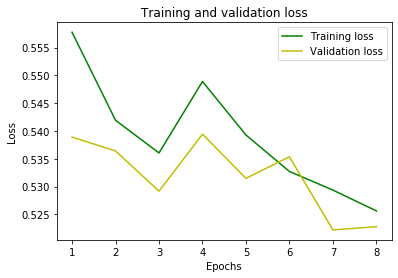

In [39]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

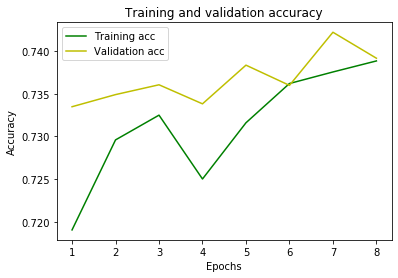

In [40]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1) #?
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

LSTM

In [ ]:
# try 1 way LSTM
# Random search drop out rate and number of units/neurons
X_train = np.array(X_train)
X_test = np.array(X_test)
input_shape = (X_train.shape[1], 1)

units = 128


model = Sequential()
model.add(Reshape((50, 50), input_shape=(2500,)))
# 1 sees the past 
# 2 sees the past and the future
dropout = .19 
print('Number of hidden units: ', units, 'Dropout: ', dropout)
model.add(LSTM(units, input_shape=input_shape)) # 64, $128$, 256, 512
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print('Training...')
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    batch_size = 128, 
    epochs = 8,
    validation_split = 0.1
)

print(model.evaluate(np.array(X_test), y_test), "\n\n")

Number of hidden units:  128 Dropout:  0.19
Training...
Train on 132848 samples, validate on 14761 samples
Epoch 1/8
132848/132848 [==============================] - 1390s 10ms/step - loss: 0.6326 - accuracy: 0.6247 - val_loss: 0.5773 - val_accuracy: 0.7191
Epoch 2/8
132848/132848 [==============================] - 1378s 10ms/step - loss: 0.5787 - accuracy: 0.7175 - val_loss: 0.5769 - val_accuracy: 0.7189
Epoch 3/8
132848/132848 [==============================] - 1363s 10ms/step - loss: 0.5875 - accuracy: 0.6989 - val_loss: 0.5653 - val_accuracy: 0.7241
Epoch 4/8
132848/132848 [==============================] - 1374s 10ms/step - loss: 0.5814 - accuracy: 0.7105 - val_loss: 0.5646 - val_accuracy: 0.7248
Epoch 5/8
130304/132848 [============================>.] - ETA: 28s - loss: 0.5665 - accuracy: 0.7194

In [ ]:
predictions = [i[0] for i in model.predict_classes(X_test)]

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("Sensitivity: ", str(tp/(tp+fn)), '\n')
print('Specificity:', str(tn/(tn+fp)), '\n')

We can plot the training and validation accuracy and loss at each epoch by using the history variable returned by the fit function.

In [ ]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1) #?
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<hr/>
Classification Using SKlearn - Traditional ML Algorithms
<hr/>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

h = .02  # step size in the mesh

names = ["Random Forest", "MLP"]

classifiers = [
    RandomForestClassifier(max_depth=10, n_estimators=100),
    MLPClassifier()
]

print("{0:20}{1:40}\n-----------------------------------------------------".\
      format("Classifier", "Accuracy"))

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    start_time = time()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    end_time = time()
    print("{0:20}{1:40}{2:40}".format(name, str(score), (end_time - start_time)))